<a href="https://colab.research.google.com/github/Nikunjbansal99/ClusteringNIPSConferencePapers1987-2015/blob/main/ClusteringNIPSConferencePapers1987_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Methodology**


*   **Import Some Basic Libraries**
*   **Import Data**
*   **Perform Descriptive Analysis on the dataset**
    *   **Data Description**
    *   **Check null/NAN values**
*   **Plotting Dendograms for different number of clusters**
*   **Train-Test Splitting**
*   **Apply Dimensionality Reduction Using PCA**
*   **Implementing different clustering algorithm's for different number of clusters and perform visualization**
*   **Initialize Model Selected**
    *   **Get labels of Training Data**
    *   **Get labels of Testing Data**
*   **On Training data, Evaluating Model based on Silhouette Score, Calinski Harabasz Score and Davies Bouldin Score**
*   **On Testing data, Evaluating Model based on Silhouette Score, Calinski Harabasz Score and Davies Bouldin Score**

# **Importing Some Basic Libraries**

In [ ]:
pip install scikit-learn-extra

     |████████████████████████████████| 624kB 9.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.1.0b2-cp36-cp36m-linux_x86_64.whl size=340329 sha256=3d8282de528b9474ab833a3cc4cb17f38b0683efeef2fd08d1c8f3d61be66c27
  Stored in directory: /root/.cache/pip/wheels/04/01/0f/943bffb48bac048fa216b4325f1a6c939491ccb0ff500e08f4
Successfully built scikit-learn-extra


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.utils import check_random_state
import sys, os
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import MeanShift
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report, confusion_matrix
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

# **Importing Data**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
input_data_dir = "/content/gdrive/My Drive/Task_9/"
NIPS_full_df = pd.read_csv(os.path.join(input_data_dir, "NIPS_1987-2015.csv"))

# **Descriptive Analysis of the dataset**

In [ ]:
print("Size of NIPS DataFrame     : {}".format(NIPS_full_df.shape))

Size of NIPS DataFrame     : (11463, 5812)


## **Data Description**

In [ ]:
print("Total Number of Papers included in NIPS DataFrame     : {}".format(len(NIPS_full_df.columns)-1))

Total Number of Papers included in NIPS DataFrame     : 5811


In [ ]:
NIPS_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11463 entries, 0 to 11462
Columns: 5812 entries, Unnamed: 0 to 2015_403
dtypes: int64(5811), object(1)
memory usage: 508.3+ MB


In [ ]:
NIPS_full_df.describe().T

,count,mean,std,min,25%,50%,75%,max
1987_1,11463.0,0.068656,0.582488,0.0,0.0,0.0,0.0,21.0
1987_2,11463.0,0.189043,1.141657,0.0,0.0,0.0,0.0,53.0
1987_3,11463.0,0.102155,0.836137,0.0,0.0,0.0,0.0,45.0
1987_4,11463.0,0.138009,1.020881,0.0,0.0,0.0,0.0,33.0
1987_5,11463.0,0.198465,1.242443,0.0,0.0,0.0,0.0,41.0
...,...,...,...,...,...,...,...,...
2015_399,11463.0,0.193143,1.262328,0.0,0.0,0.0,0.0,41.0
2015_400,11463.0,0.133822,1.027739,0.0,0.0,0.0,0.0,57.0
2015_401,11463.0,0.186775,1.469907,0.0,0.0,0.0,0.0,49.0
2015_402,11463.0,0.182326,1.305631,0.0,0.0,0.0,0.0,45.0


In [ ]:
NIPS_full_df = NIPS_full_df.transpose()

In [ ]:
NIPS_full_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,11423,11424,11425,11426,11427,11428,11429,11430,11431,11432,11433,11434,11435,11436,11437,11438,11439,11440,11441,11442,11443,11444,11445,11446,11447,11448,11449,11450,11451,11452,11453,11454,11455,11456,11457,11458,11459,11460,11461,11462
Unnamed: 0,abalone,abbeel,abbott,abbreviate,abbreviated,abc,abeles,abernethy,abilistic,abilities,ability,ables,abnormal,abound,abrupt,abs,abscissa,absence,absent,absolute,absolutely,absorbed,absorbing,absorption,abstract,abstraction,abstractions,abstracts,abundance,abundant,abuse,academic,academy,accelerate,accelerated,accelerating,acceleration,accelerations,accept,acceptable,...,write,writer,writes,writing,written,wrong,xavier,xing,xiong,yahoo,yale,year,years,yeast,yedidia,yee,yellow,yen,york,yorktown,yoshua,young,youtube,zebra,zeroth,zha,zhang,zhao,zheng,zhong,zhou,zhu,zien,zilberstein,zones,zoo,zoom,zou,zoubin,zurich
1987_1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1987_2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1987_3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1987_4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_header = NIPS_full_df.iloc[0] #grab the first row for the header
NIPS_full_df = NIPS_full_df[1:] #take the data less the header row
NIPS_full_df.columns = new_header #set the header row as the df header

In [ ]:
NIPS_full_df.head()

Unnamed: 0,abalone,abbeel,abbott,abbreviate,abbreviated,abc,abeles,abernethy,abilistic,abilities,ability,ables,abnormal,abound,abrupt,abs,abscissa,absence,absent,absolute,absolutely,absorbed,absorbing,absorption,abstract,abstraction,abstractions,abstracts,abundance,abundant,abuse,academic,academy,accelerate,accelerated,accelerating,acceleration,accelerations,accept,acceptable,...,write,writer,writes,writing,written,wrong,xavier,xing,xiong,yahoo,yale,year,years,yeast,yedidia,yee,yellow,yen,york,yorktown,yoshua,young,youtube,zebra,zeroth,zha,zhang,zhao,zheng,zhong,zhou,zhu,zien,zilberstein,zones,zoo,zoom,zou,zoubin,zurich
1987_1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1987_2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1987_3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1987_4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1987_5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **NULL VALUES:**

In [ ]:
NIPS_full_df.isna().sum() 

Unnamed: 0
abalone        0
abbeel         0
abbott         0
abbreviate     0
abbreviated    0
              ..
zoo            0
zoom           0
zou            0
zoubin         0
zurich         0
Length: 11463, dtype: int64

In [ ]:
print("Total Number of Missing Values in NIPS DataFrame     : {}".format(NIPS_full_df.isna().sum().sum()))   

Total Number of Missing Values in NIPS DataFrame     : 0


# **Plotting Dendograms:**

In [ ]:
def dendrogramPlot(model, **kwargs):                                            # Create linkage matrix and then plot the dendrogram
    counts = np.zeros(model.children_.shape[0])                                 # Create the counts of samples under each node

    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_,counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)                                        # Plot the corresponding dendrogram 

In [ ]:
ClusteringModel = AgglomerativeClustering(distance_threshold=0, n_clusters=None)# setting distance_threshold=0 ensures we compute the full tree.

In [ ]:
ClusteringModel = ClusteringModel.fit(NIPS_full_df)

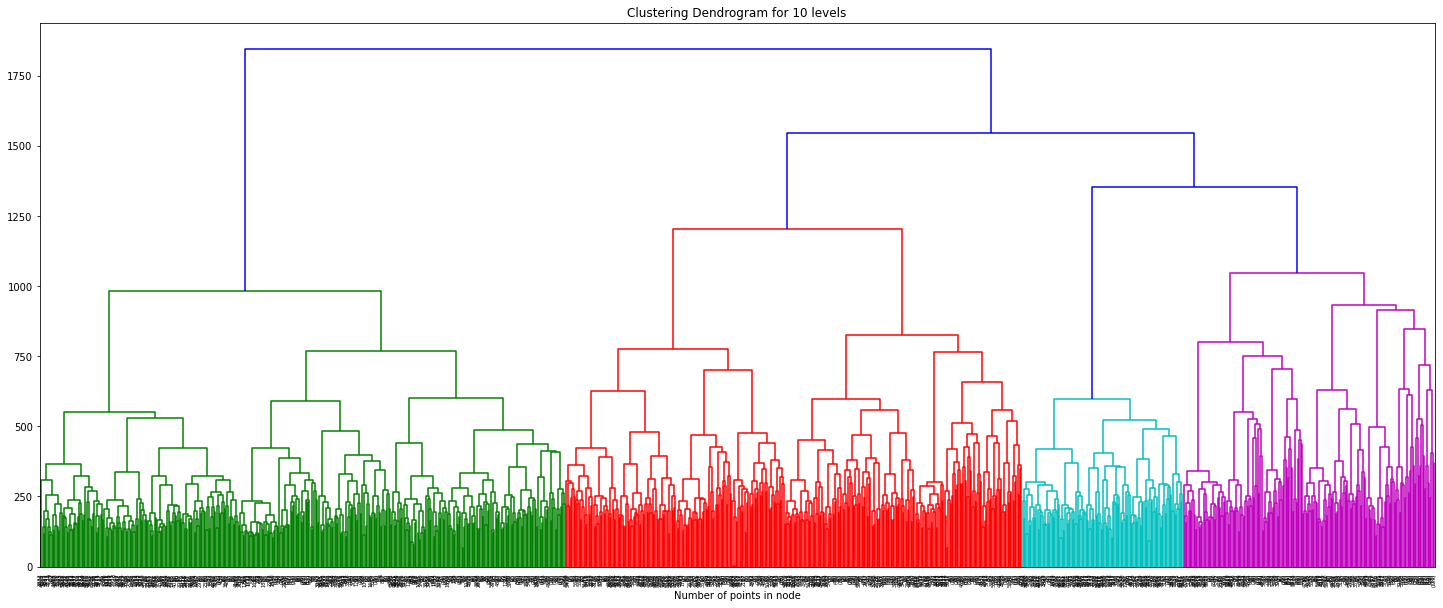

In [ ]:
plt.figure(figsize=(25,10))
plt.title('Clustering Dendrogram for 10 levels')
dendrogramPlot(ClusteringModel, p=10, truncate_mode='level')                    
plt.xlabel("Number of points in node")
plt.show()

**Too much dense. So, going for dendogram with levels 8.**

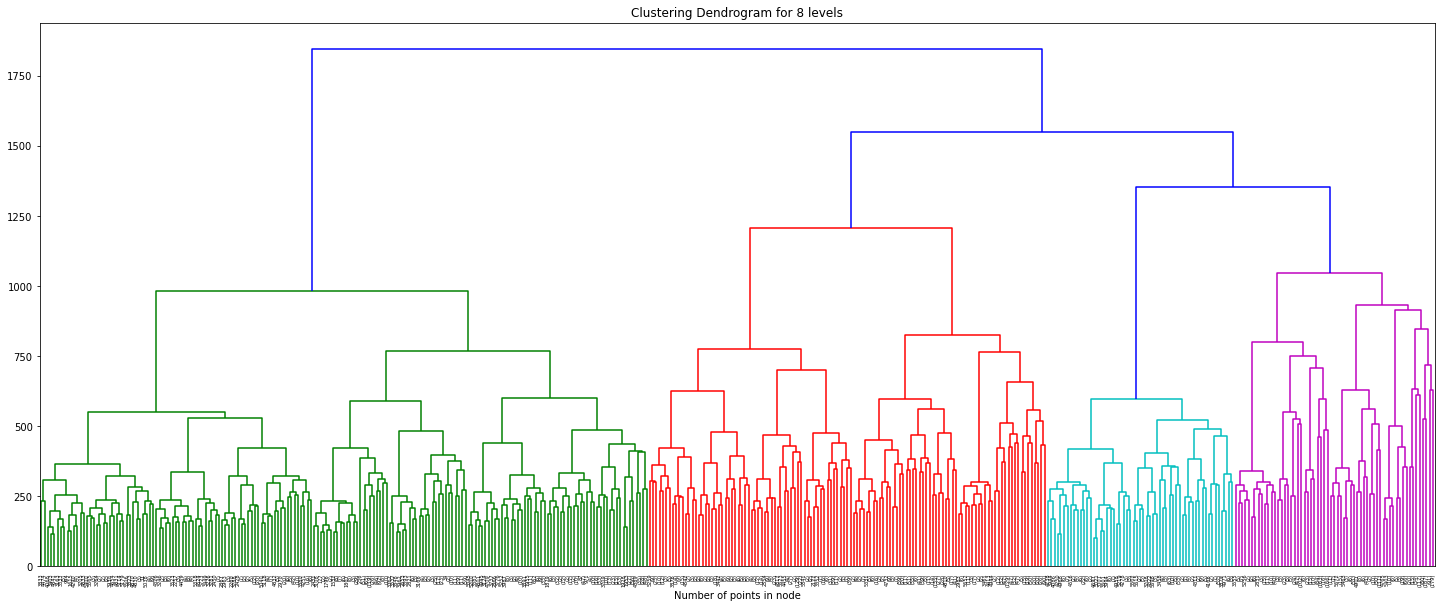

In [ ]:
plt.figure(figsize=(25,10))
plt.title('Clustering Dendrogram for 8 levels')
dendrogramPlot(ClusteringModel, p=8, truncate_mode='level')                    
plt.xlabel("Number of points in node")
plt.show()

**Too much dense. So, going for dendogram with levels 7.**

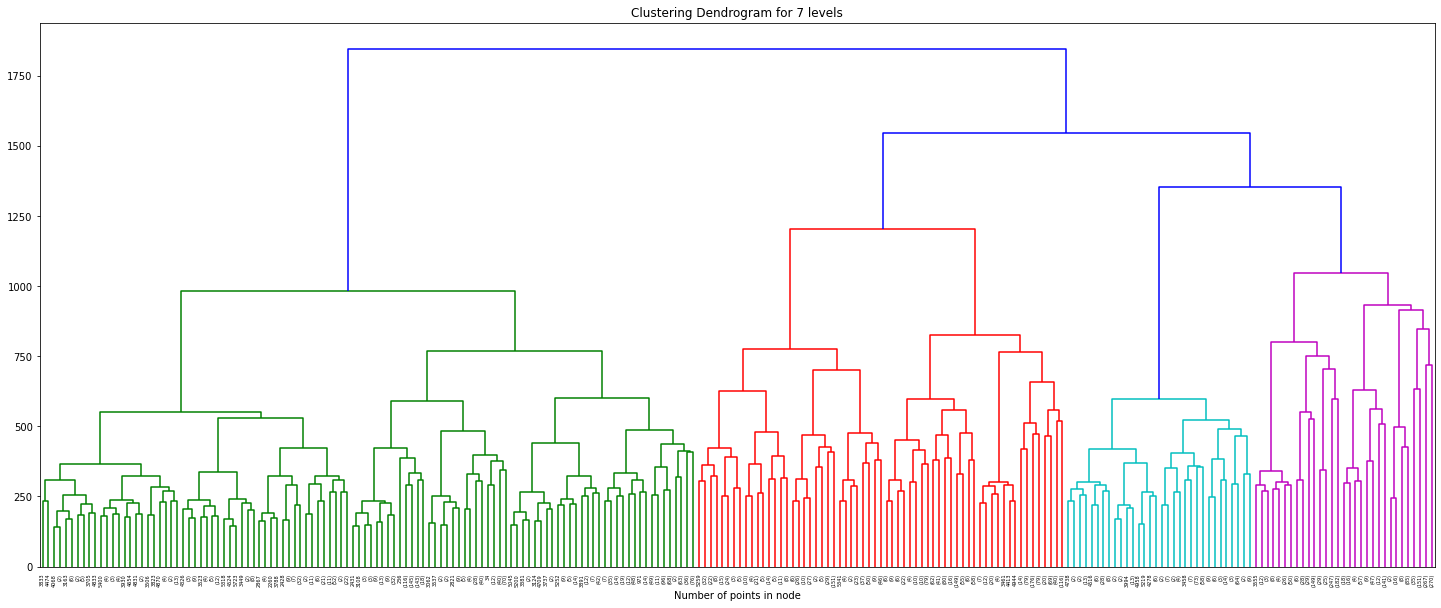

In [ ]:
plt.figure(figsize=(25,10))
plt.title('Clustering Dendrogram for 7 levels')
dendrogramPlot(ClusteringModel, p=7, truncate_mode='level')                    
plt.xlabel("Number of points in node")
plt.show()

**Too much dense. So, going for dendogram with levels 6.**

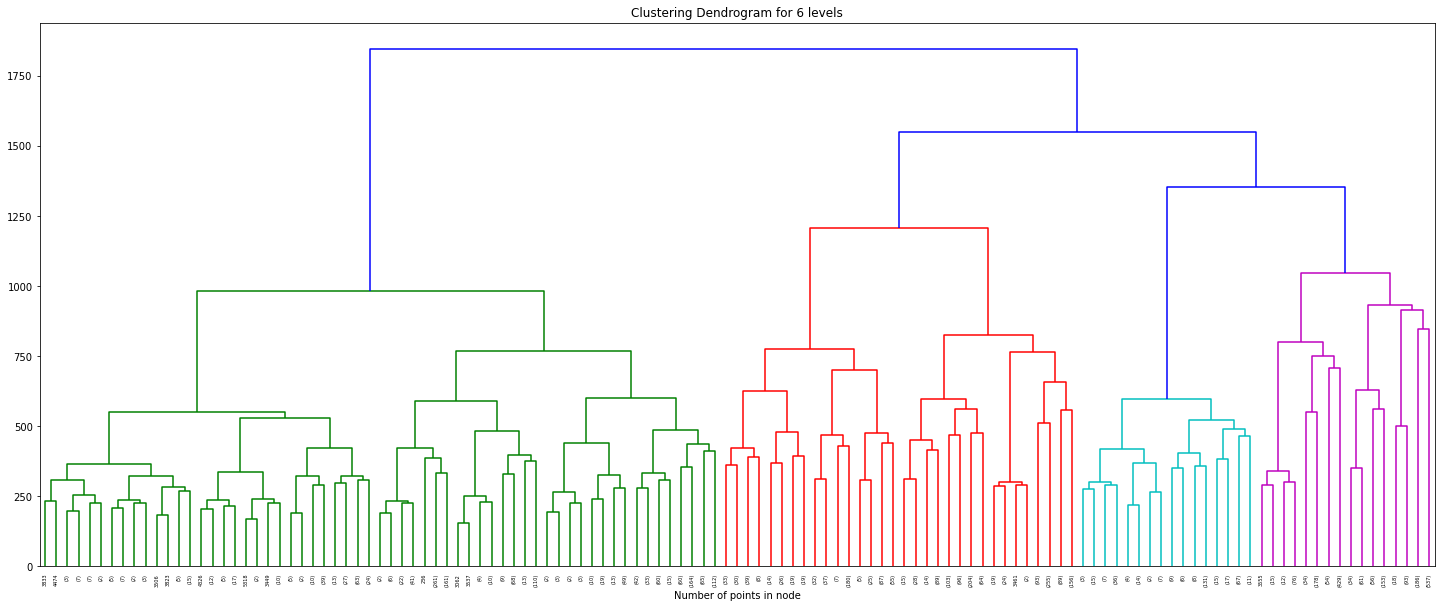

In [ ]:
plt.figure(figsize=(25,10))
plt.title('Clustering Dendrogram for 6 levels')
dendrogramPlot(ClusteringModel, p=6, truncate_mode='level')                    
plt.xlabel("Number of points in node")
plt.show()

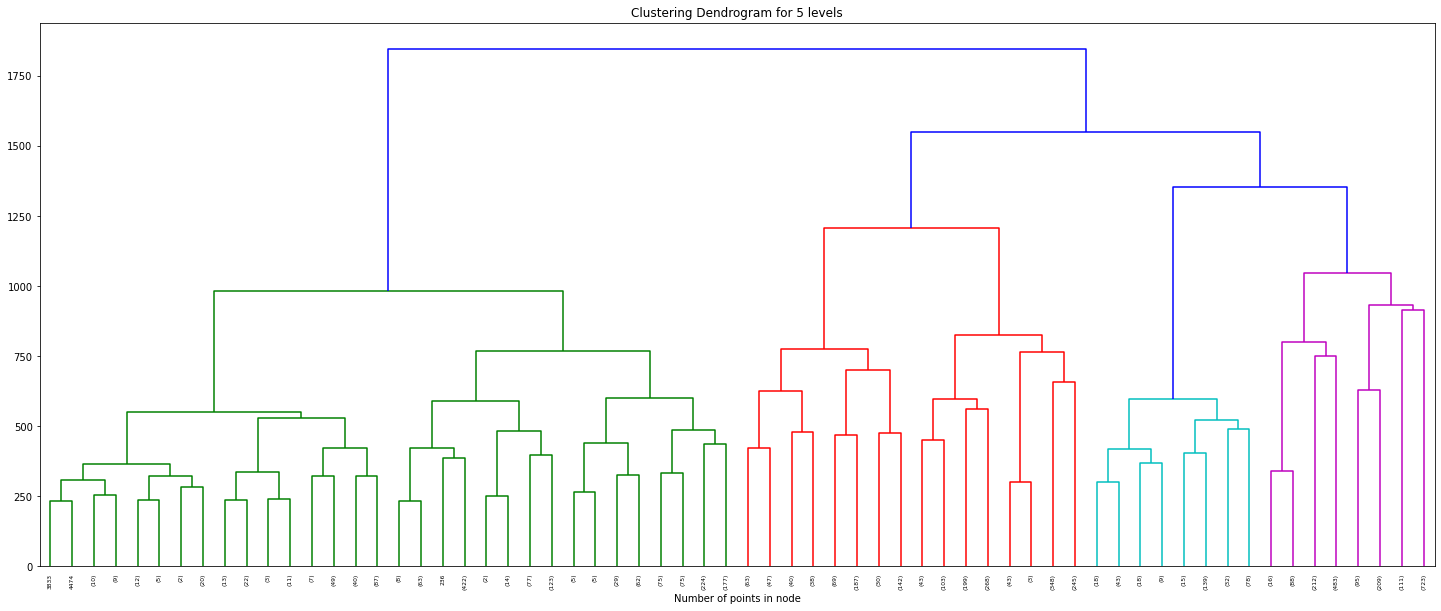

In [ ]:
plt.figure(figsize=(25,10))
plt.title('Clustering Dendrogram for 5 levels')
dendrogramPlot(ClusteringModel, p=5, truncate_mode='level')                    
plt.xlabel("Number of points in node")
plt.show()

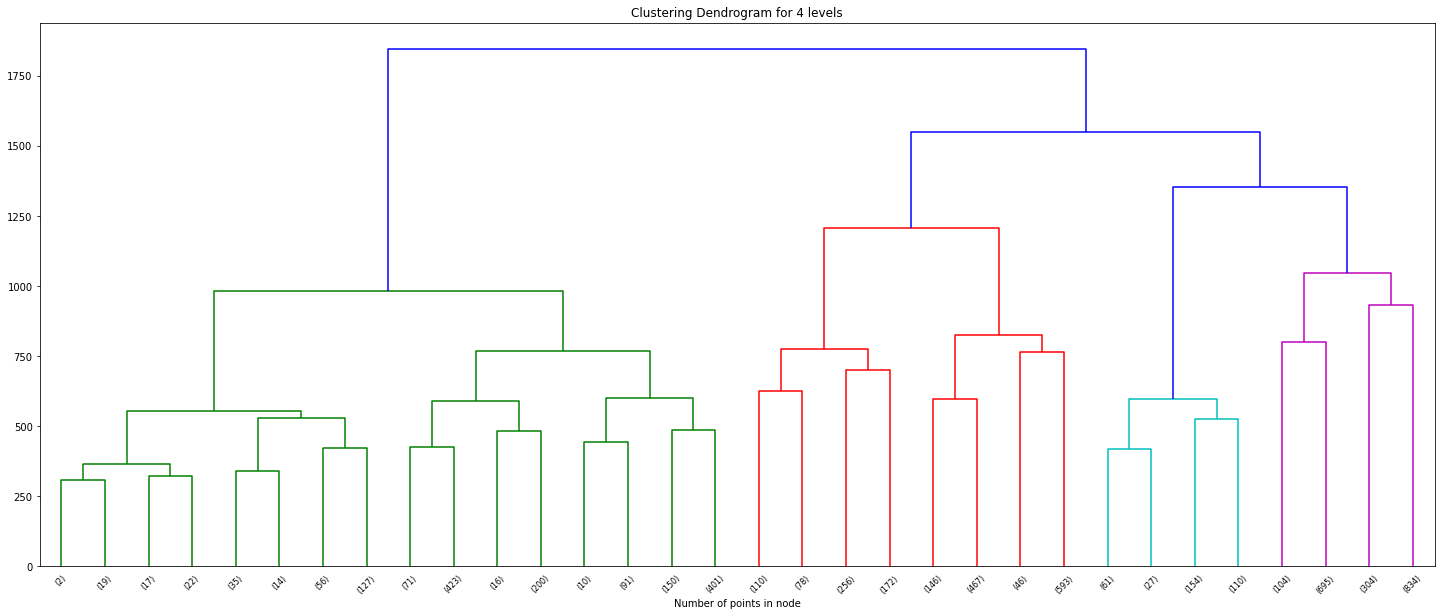

In [ ]:
plt.figure(figsize=(25,10))
plt.title('Clustering Dendrogram for 4 levels')
dendrogramPlot(ClusteringModel, p=4, truncate_mode='level')                    
plt.xlabel("Number of points in node")
plt.show()

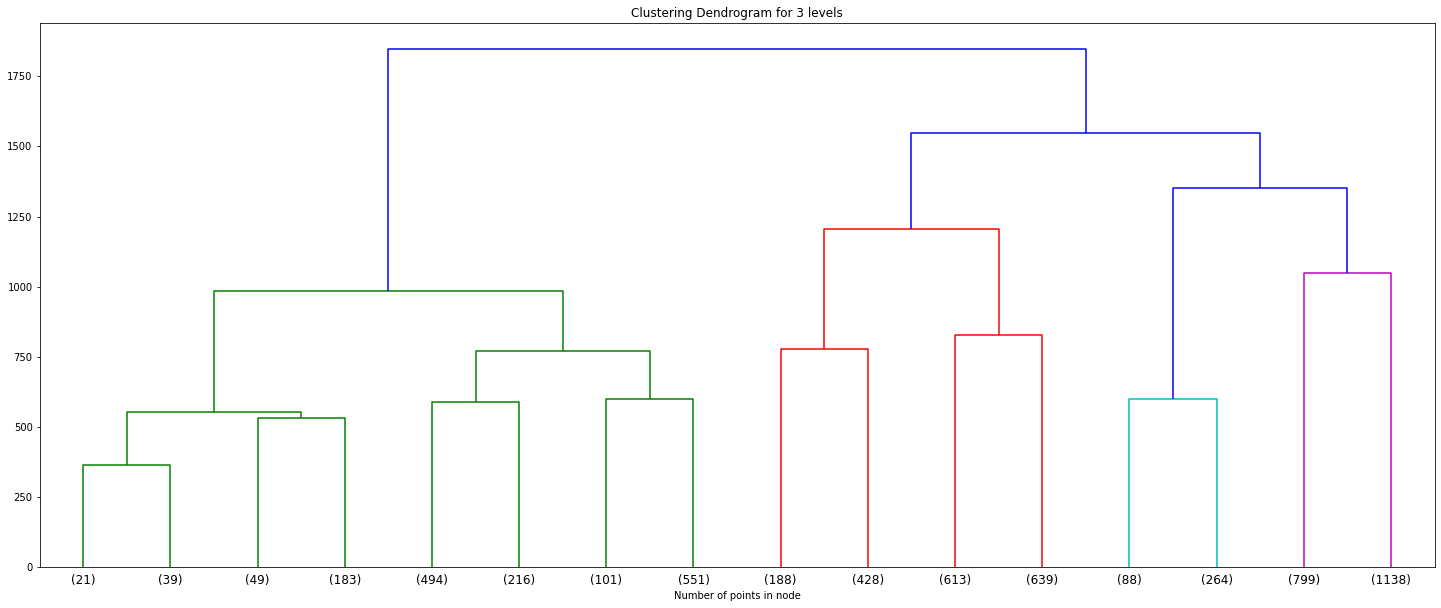

In [ ]:
plt.figure(figsize=(25,10))
plt.title('Clustering Dendrogram for 3 levels')
dendrogramPlot(ClusteringModel, p=3, truncate_mode='level')                    
plt.xlabel("Number of points in node")
plt.show()

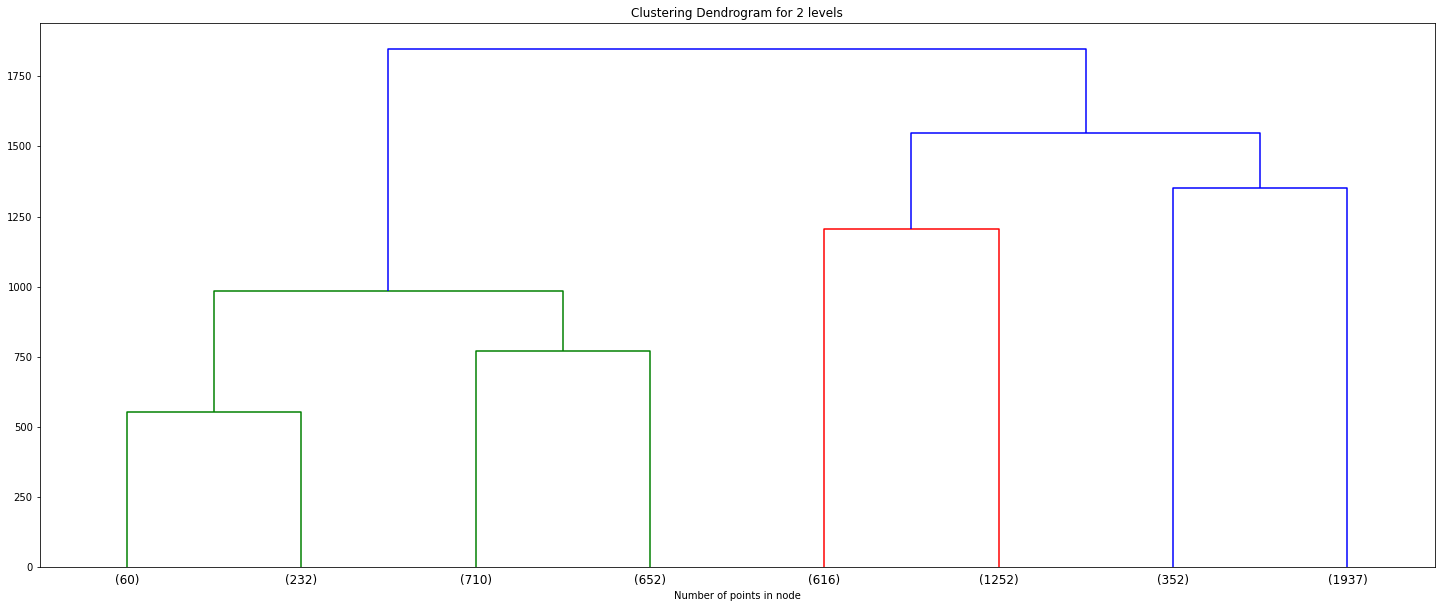

In [ ]:
plt.figure(figsize=(25,10))
plt.title('Clustering Dendrogram for 2 levels')
dendrogramPlot(ClusteringModel, p=2, truncate_mode='level')                    
plt.xlabel("Number of points in node")
plt.show()

# **Train-Test Splitting:**

In [ ]:
# Splitting NIPS_full_df into 70% and 30% to construct training dataframe and testing dataframe respectively.
traindf, testdf = train_test_split(NIPS_full_df, test_size=0.3, random_state=11)

In [ ]:
print("Size of Training Dataframe       : {}".format(traindf.shape))
print("Size of Testing Dataframe      : {}".format(testdf.shape))

Size of Training Dataframe       : (4067, 11463)
Size of Testing Dataframe      : (1744, 11463)


In [ ]:
traindf.head()

Unnamed: 0,abalone,abbeel,abbott,abbreviate,abbreviated,abc,abeles,abernethy,abilistic,abilities,ability,ables,abnormal,abound,abrupt,abs,abscissa,absence,absent,absolute,absolutely,absorbed,absorbing,absorption,abstract,abstraction,abstractions,abstracts,abundance,abundant,abuse,academic,academy,accelerate,accelerated,accelerating,acceleration,accelerations,accept,acceptable,...,write,writer,writes,writing,written,wrong,xavier,xing,xiong,yahoo,yale,year,years,yeast,yedidia,yee,yellow,yen,york,yorktown,yoshua,young,youtube,zebra,zeroth,zha,zhang,zhao,zheng,zhong,zhou,zhu,zien,zilberstein,zones,zoo,zoom,zou,zoubin,zurich
2004_107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2011_82,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015_124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
1990_49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2011_192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
testdf.head()

Unnamed: 0,abalone,abbeel,abbott,abbreviate,abbreviated,abc,abeles,abernethy,abilistic,abilities,ability,ables,abnormal,abound,abrupt,abs,abscissa,absence,absent,absolute,absolutely,absorbed,absorbing,absorption,abstract,abstraction,abstractions,abstracts,abundance,abundant,abuse,academic,academy,accelerate,accelerated,accelerating,acceleration,accelerations,accept,acceptable,...,write,writer,writes,writing,written,wrong,xavier,xing,xiong,yahoo,yale,year,years,yeast,yedidia,yee,yellow,yen,york,yorktown,yoshua,young,youtube,zebra,zeroth,zha,zhang,zhao,zheng,zhong,zhou,zhu,zien,zilberstein,zones,zoo,zoom,zou,zoubin,zurich
2009_116,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005_149,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015_289,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0
2012_24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2006_18,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Applying Dimensionality Reduction:**

In [ ]:
# Initializing Principal Component Analysis(PCA)
PCA_method = PCA(n_components=2)

In [ ]:
# Fit And Transorm Data
traindf= PCA_method.fit_transform(traindf)
testdf = PCA_method.transform(testdf)

# **Visualizing various Algorithm's:**

In [ ]:
np.random.seed(42)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = traindf[:, 0].min() - 1, traindf[:, 0].max() + 1
y_min, y_max = traindf[:, 1].min() - 1, traindf[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

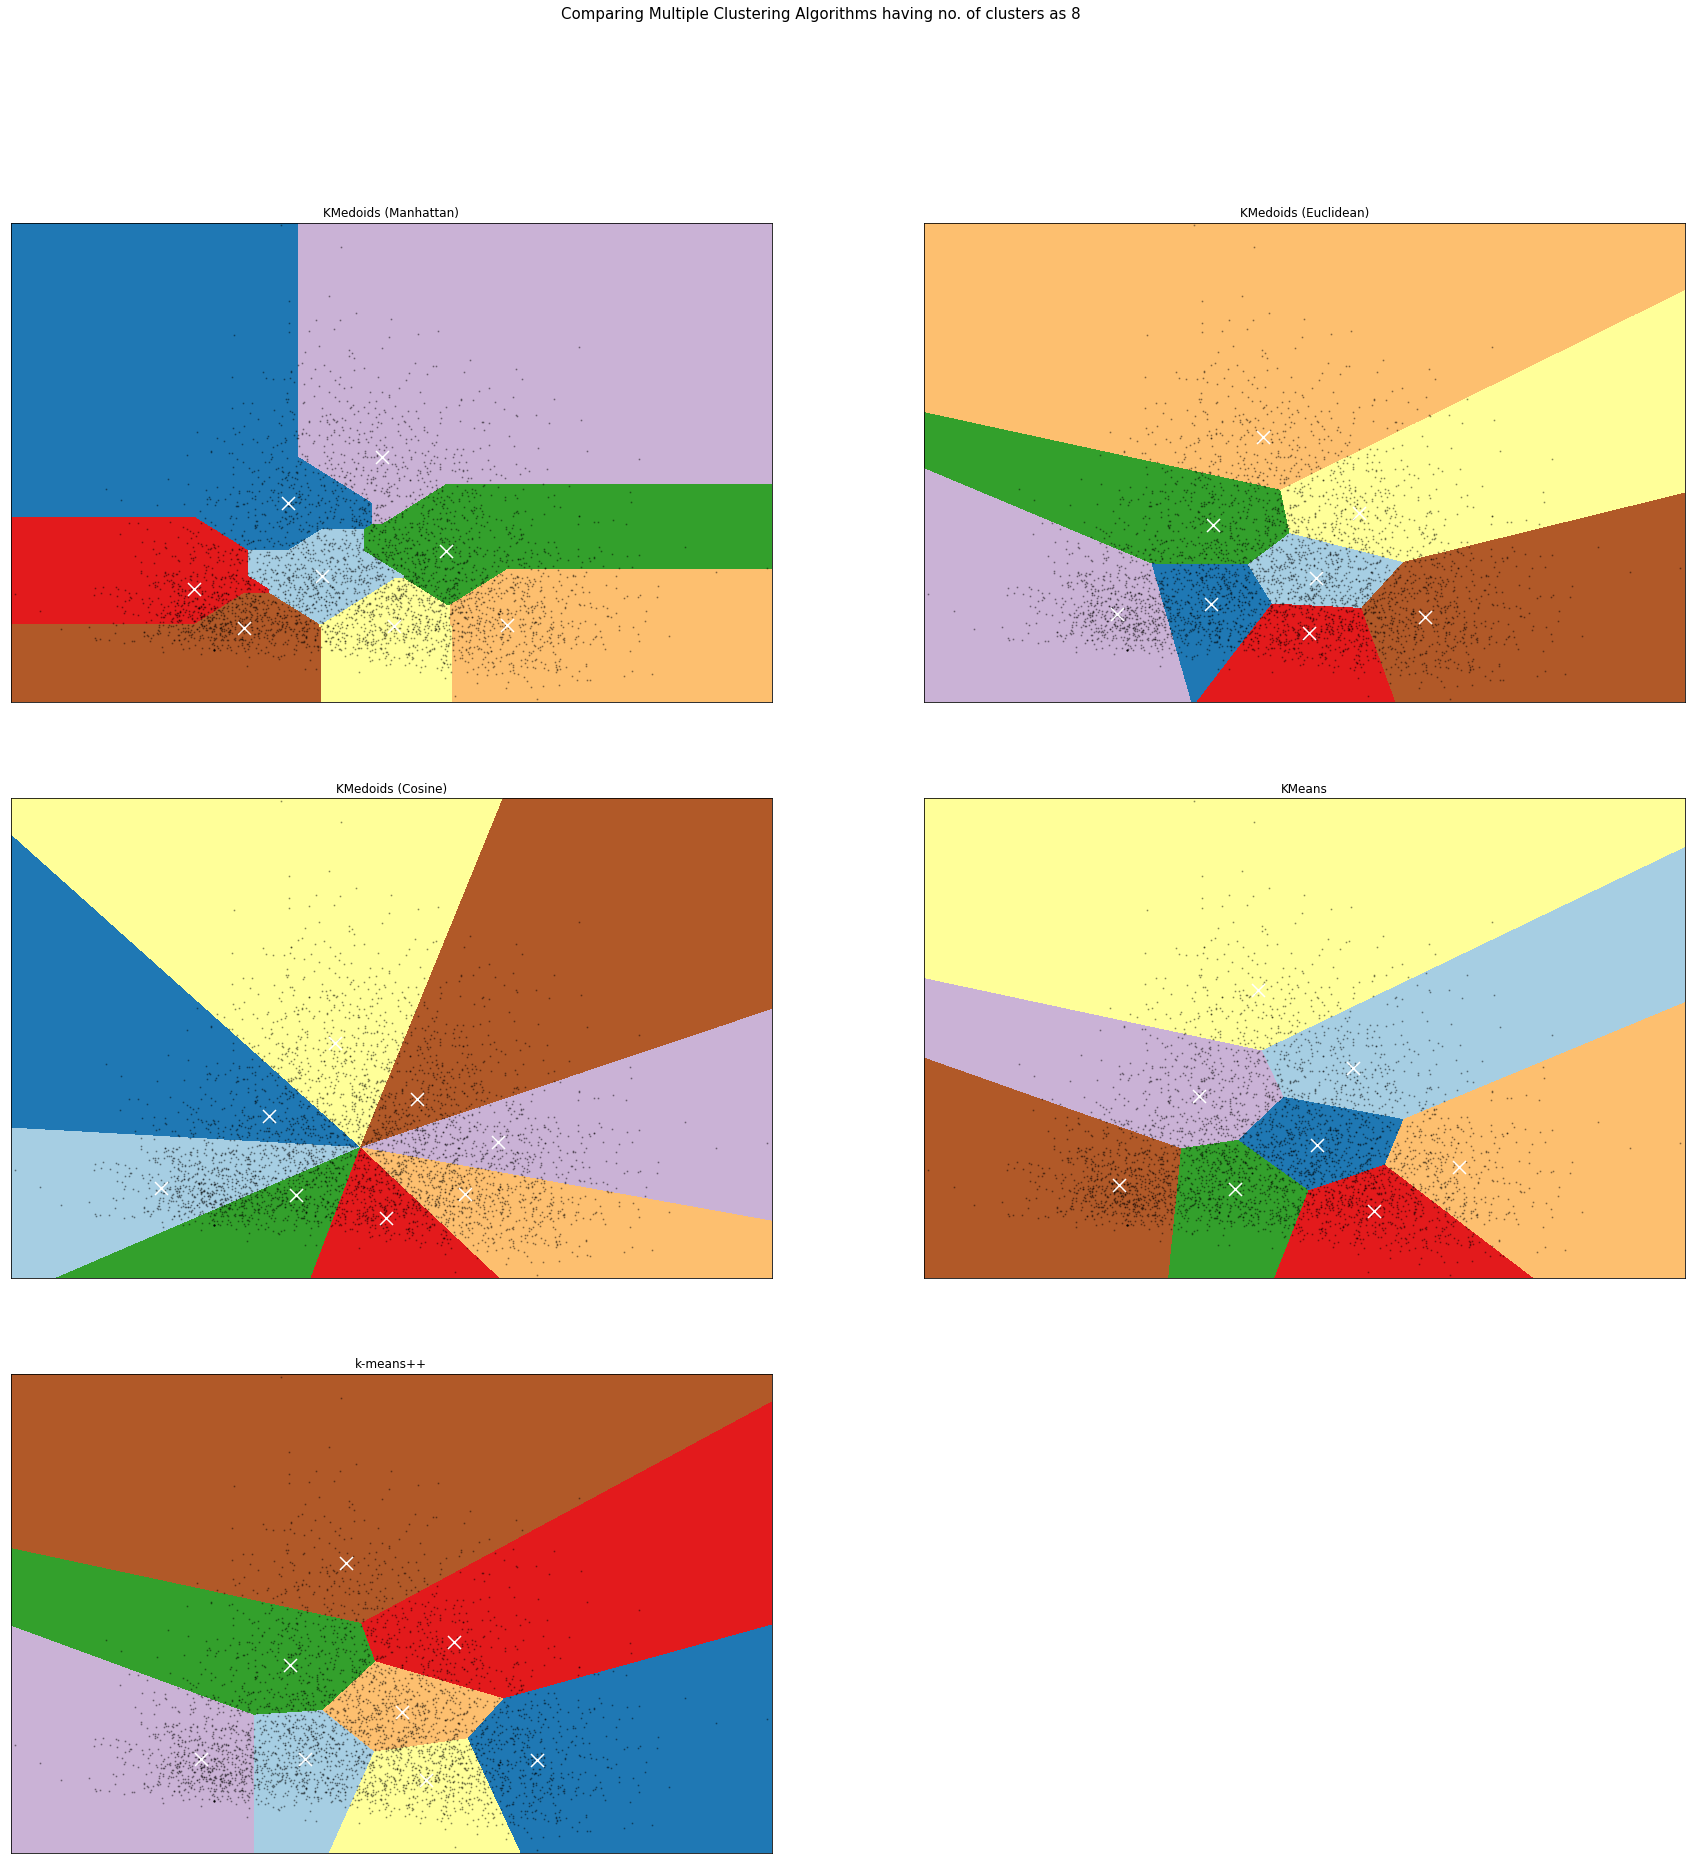

In [ ]:
plt.figure(figsize=(30,30))
plt.clf()

plt.suptitle("Comparing Multiple Clustering Algorithms having no. of clusters as 8",fontsize=15,)

choosed_models = [(KMedoids(metric="manhattan", n_clusters=8),"KMedoids (Manhattan)",),
                 (KMedoids(metric="euclidean", n_clusters=8),"KMedoids (Euclidean)",),
                 (KMedoids(metric="cosine", n_clusters=8), "KMedoids (Cosine)"),
                 (KMeans(n_clusters=8), "KMeans"),
                 (KMeans(n_clusters=8, init='k-means++'),"k-means++")]

plot_rows = 2
plot_cols = 3

for i, (i_model, description) in enumerate(choosed_models):
    i_model.fit(traindf)
    Y = i_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Y = Y.reshape(xx.shape)
    plt.subplot(plot_cols, plot_rows, i + 1)                                    # Put the result into a color plot
    plt.imshow(Y, interpolation="nearest", extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect="auto", origin="lower",)
    plt.plot(traindf[:, 0], traindf[:, 1], "k.", markersize=2, alpha=0.3)


    centroids = i_model.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3, color="w", zorder=10,)
                                        # set centroids shape as a X        ; set centroids color as a white
    plt.title(description)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
plt.show()

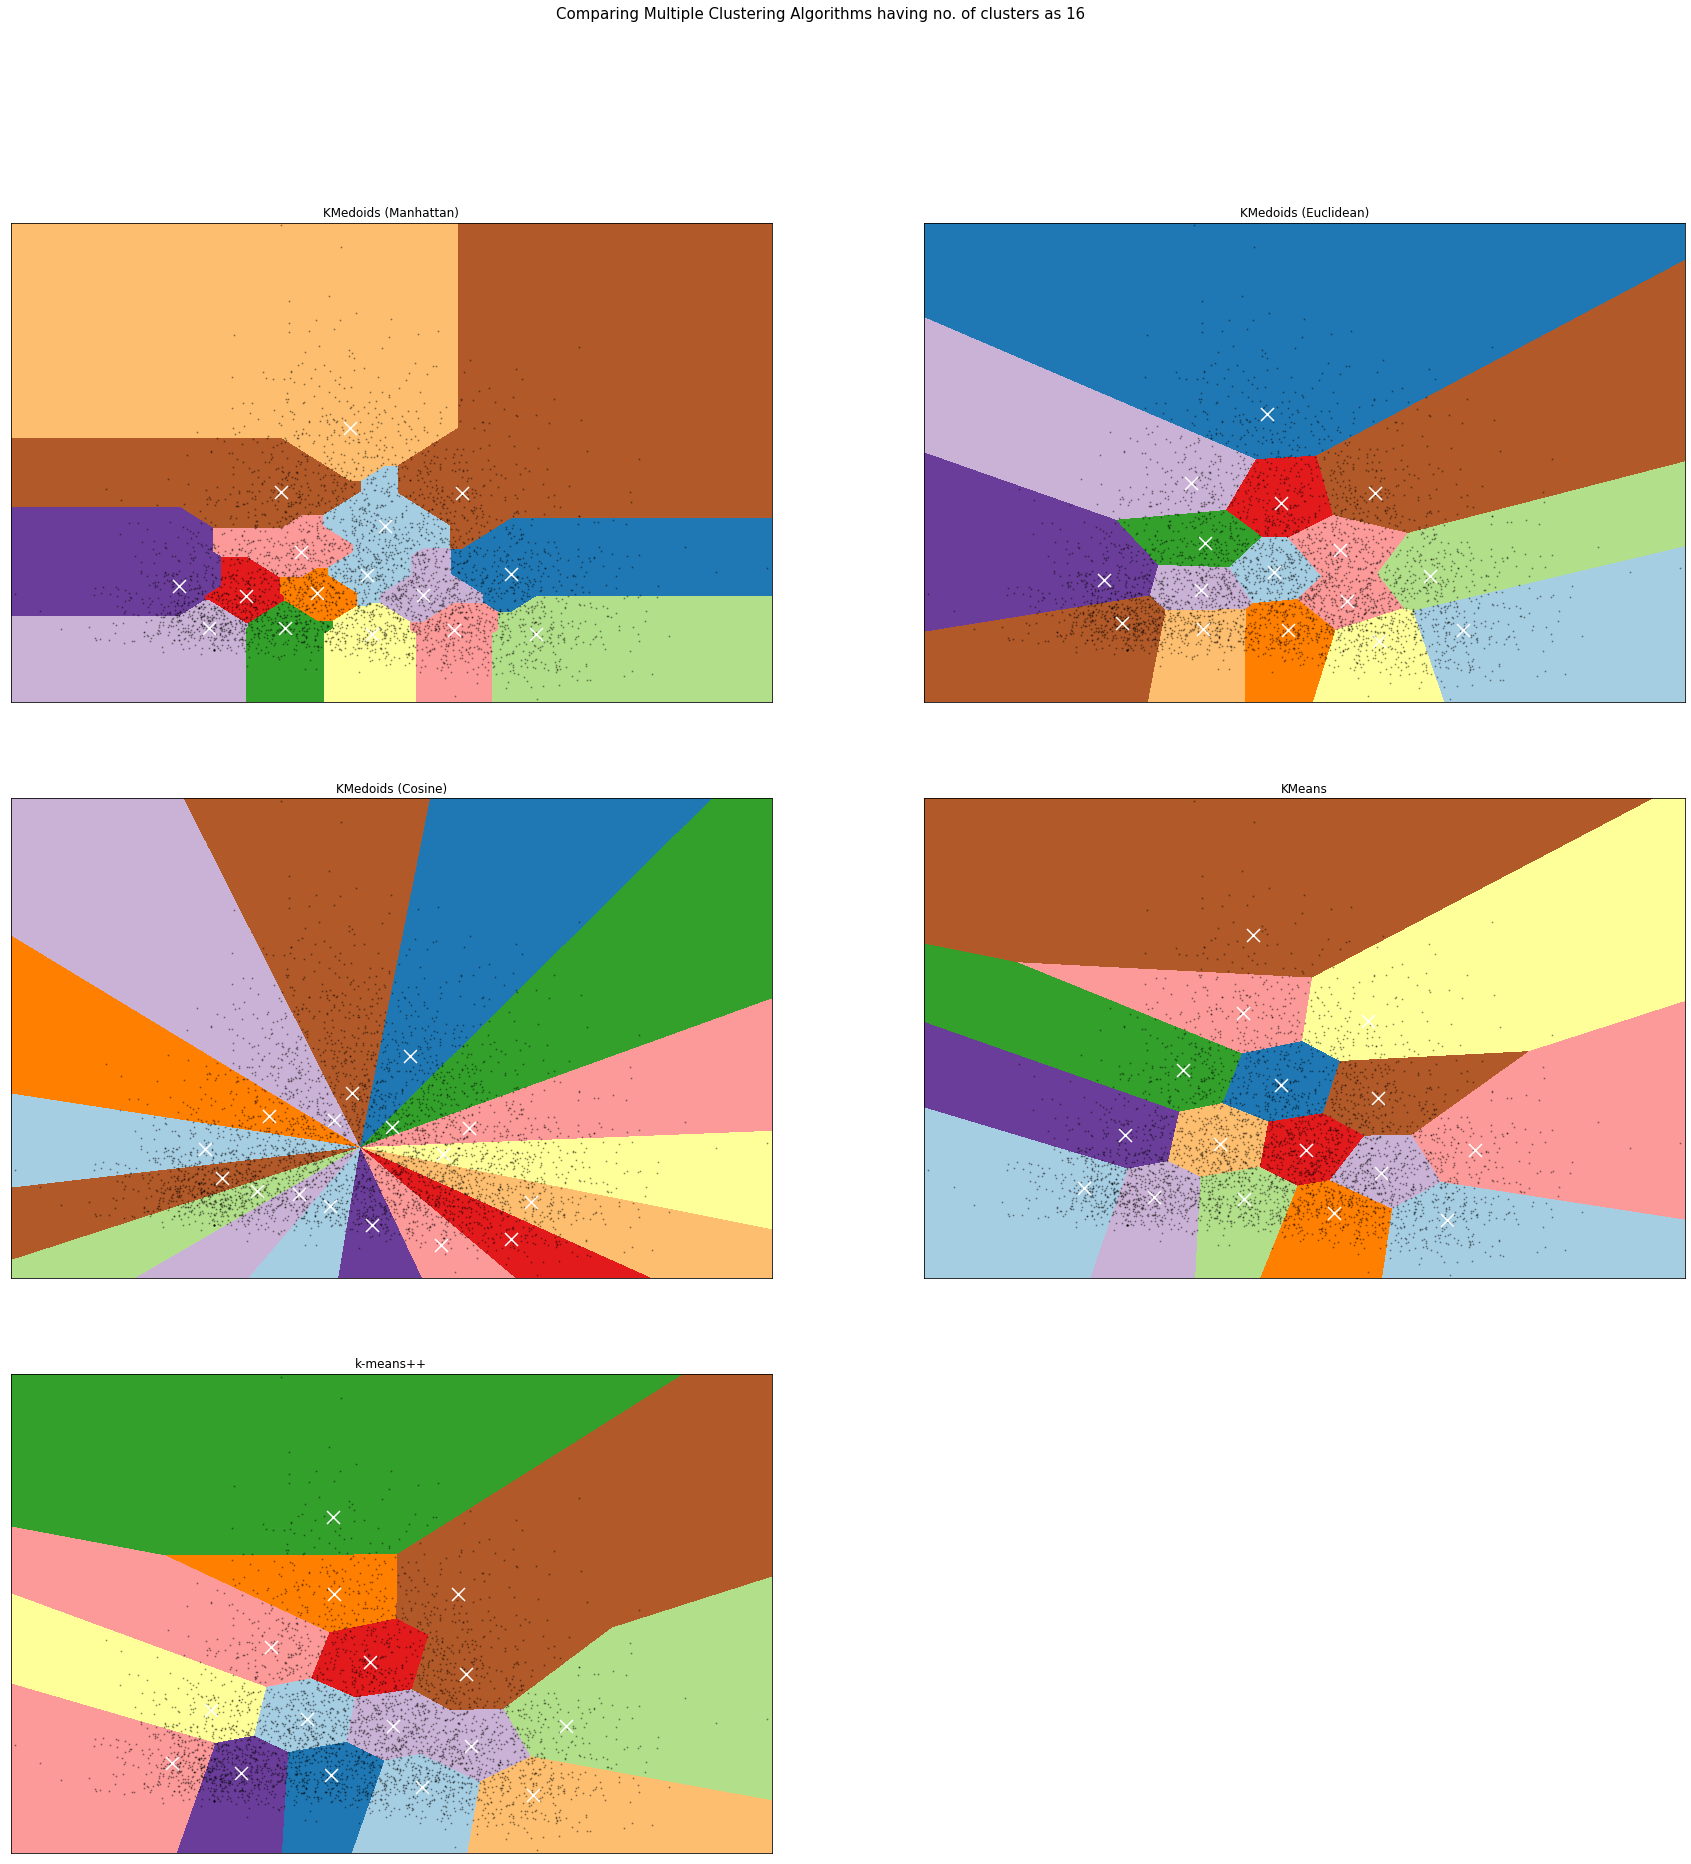

In [ ]:
plt.figure(figsize=(30,30))
plt.clf()

plt.suptitle("Comparing Multiple Clustering Algorithms having no. of clusters as 16",fontsize=15,)

choosed_models = [(KMedoids(metric="manhattan", n_clusters=16),"KMedoids (Manhattan)",),
                 (KMedoids(metric="euclidean", n_clusters=16),"KMedoids (Euclidean)",),
                 (KMedoids(metric="cosine", n_clusters=16), "KMedoids (Cosine)"),
                 (KMeans(n_clusters=16), "KMeans"),
                 (KMeans(n_clusters=16, init='k-means++'),"k-means++")]

plot_rows = 2
plot_cols = 3

for i, (i_model, description) in enumerate(choosed_models):
    i_model.fit(traindf)
    Y = i_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Y = Y.reshape(xx.shape)
    plt.subplot(plot_cols, plot_rows, i + 1)                                    # Put the result into a color plot
    plt.imshow(Y, interpolation="nearest", extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect="auto", origin="lower",)
    plt.plot(traindf[:, 0], traindf[:, 1], "k.", markersize=2, alpha=0.3)


    centroids = i_model.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3, color="w", zorder=10,)
                                        # set centroids shape as a X        ; set centroids color as a white
    plt.title(description)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
plt.show()

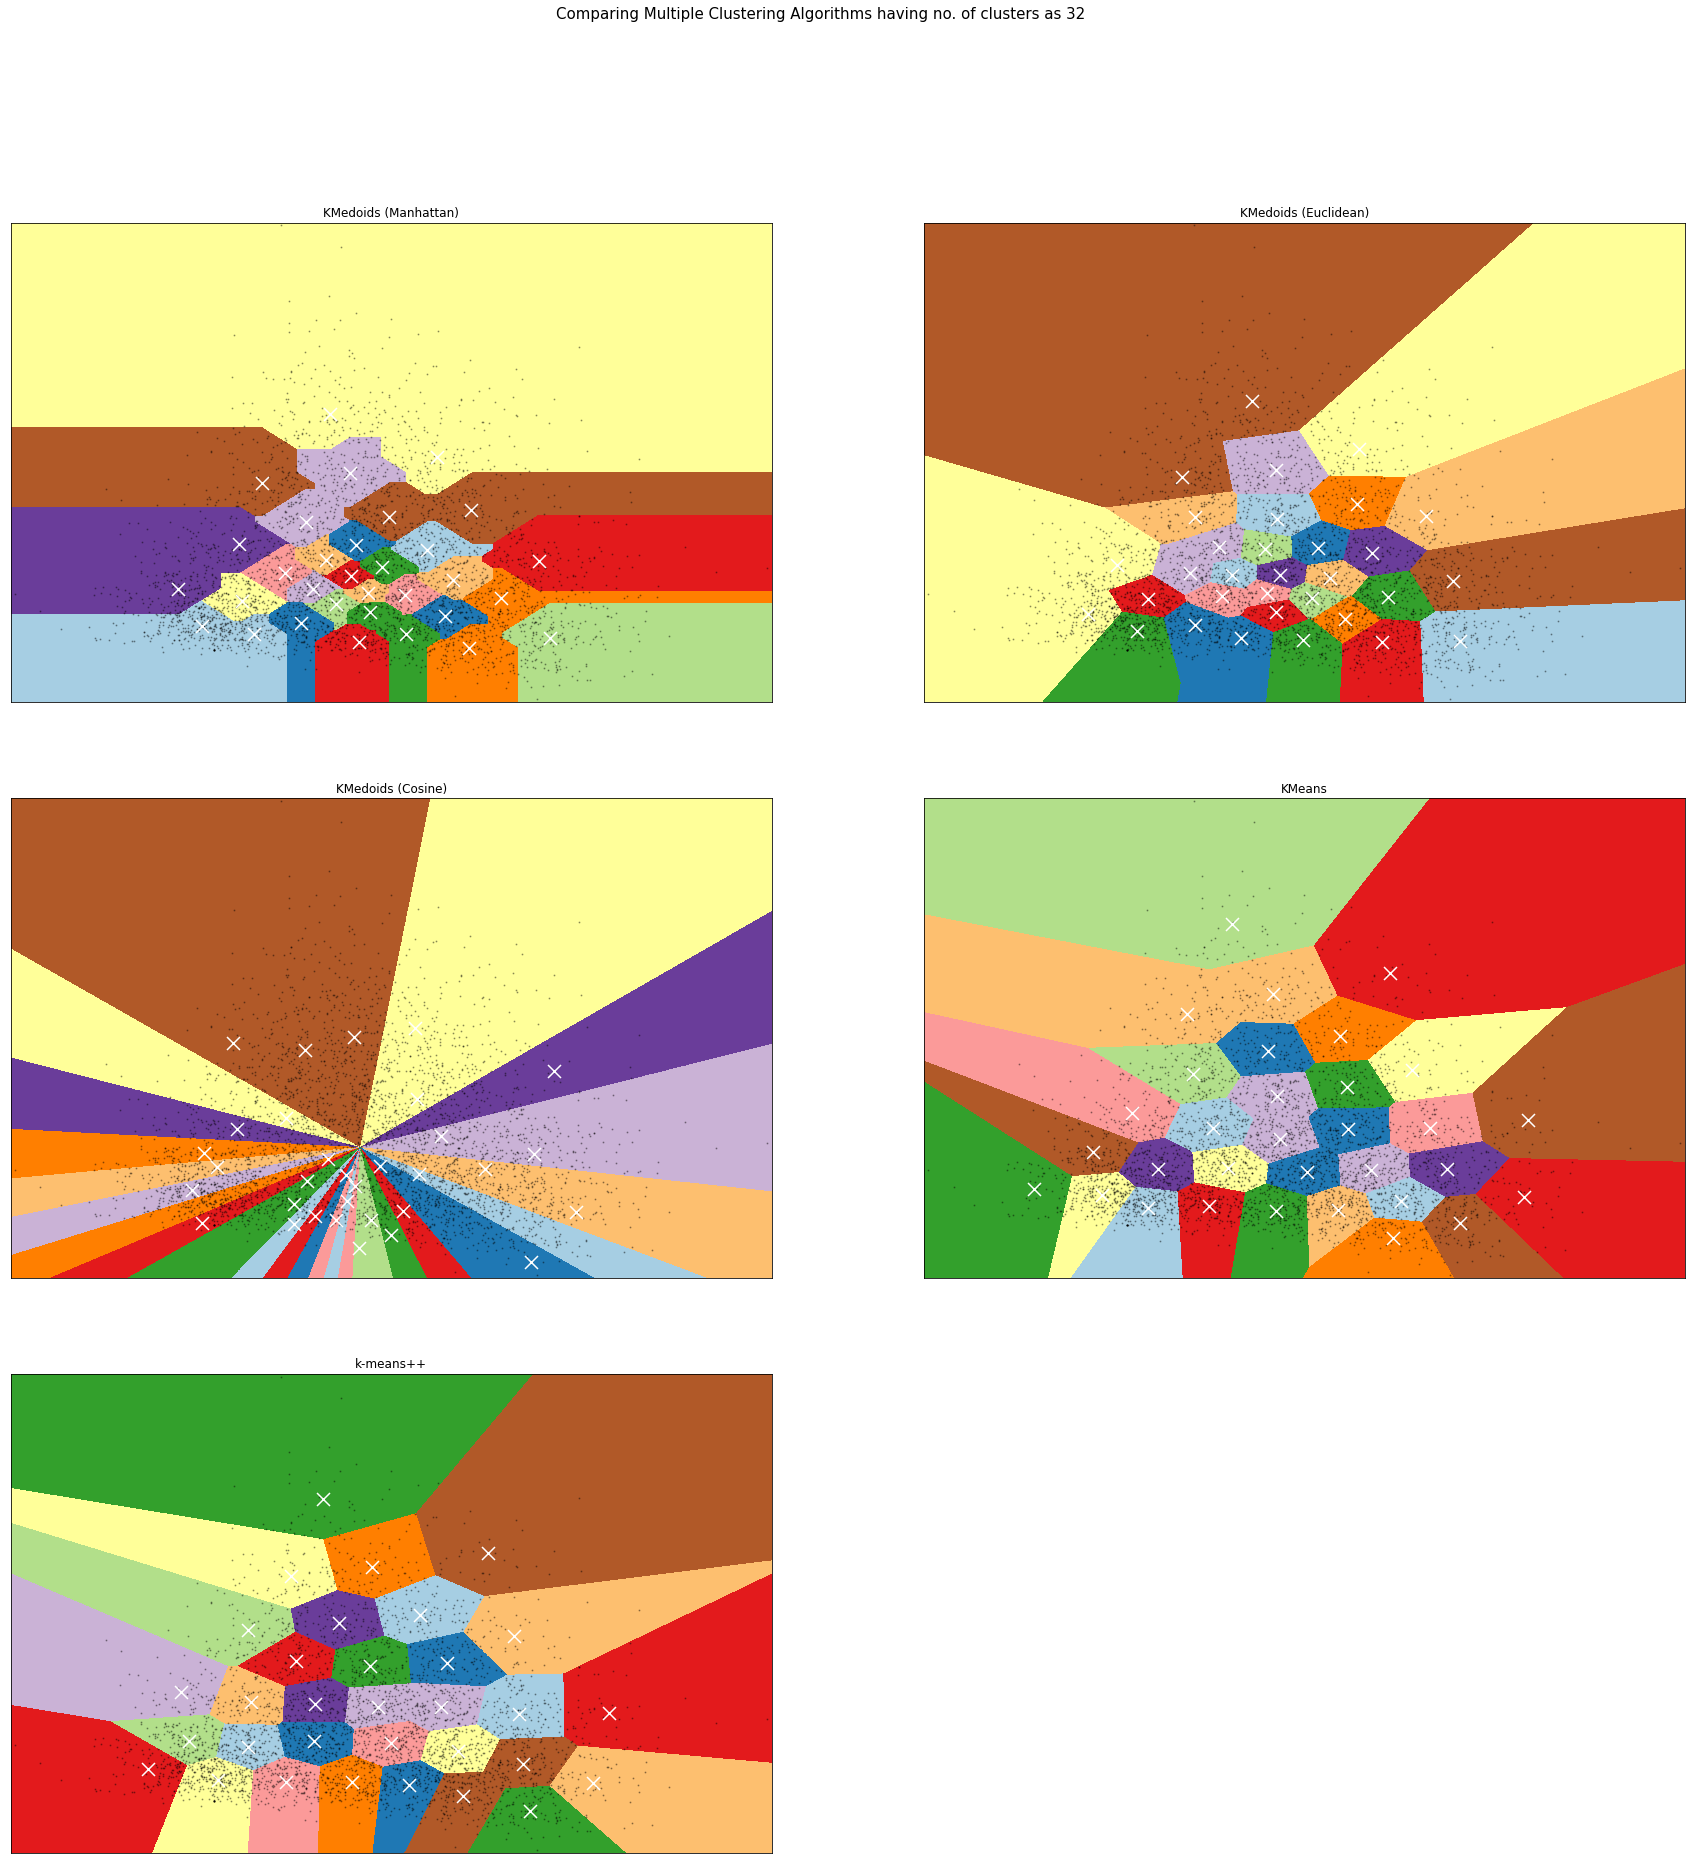

In [ ]:
plt.figure(figsize=(30,30))
plt.clf()

plt.suptitle("Comparing Multiple Clustering Algorithms having no. of clusters as 32",fontsize=15,)

choosed_models = [(KMedoids(metric="manhattan", n_clusters=32),"KMedoids (Manhattan)",),
                 (KMedoids(metric="euclidean", n_clusters=32),"KMedoids (Euclidean)",),
                 (KMedoids(metric="cosine", n_clusters=32), "KMedoids (Cosine)"),
                 (KMeans(n_clusters=32), "KMeans"),
                 (KMeans(n_clusters=32, init='k-means++'),"k-means++")]

plot_rows = 2
plot_cols = 3

for i, (i_model, description) in enumerate(choosed_models):
    i_model.fit(traindf)
    Y = i_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Y = Y.reshape(xx.shape)
    plt.subplot(plot_cols, plot_rows, i + 1)                                    # Put the result into a color plot
    plt.imshow(Y, interpolation="nearest", extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect="auto", origin="lower",)
    plt.plot(traindf[:, 0], traindf[:, 1], "k.", markersize=2, alpha=0.3)


    centroids = i_model.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3, color="w", zorder=10,)
                                        # set centroids shape as a X        ; set centroids color as a white
    plt.title(description)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn_extra/cluster/_k_medoids.py:235: UserWarning: Cluster 35 is empty! self.labels_[self.medoid_indices_[35]] may not be labeled with its corresponding cluster (35).
  "its corresponding cluster ({k}).".format(k=k)


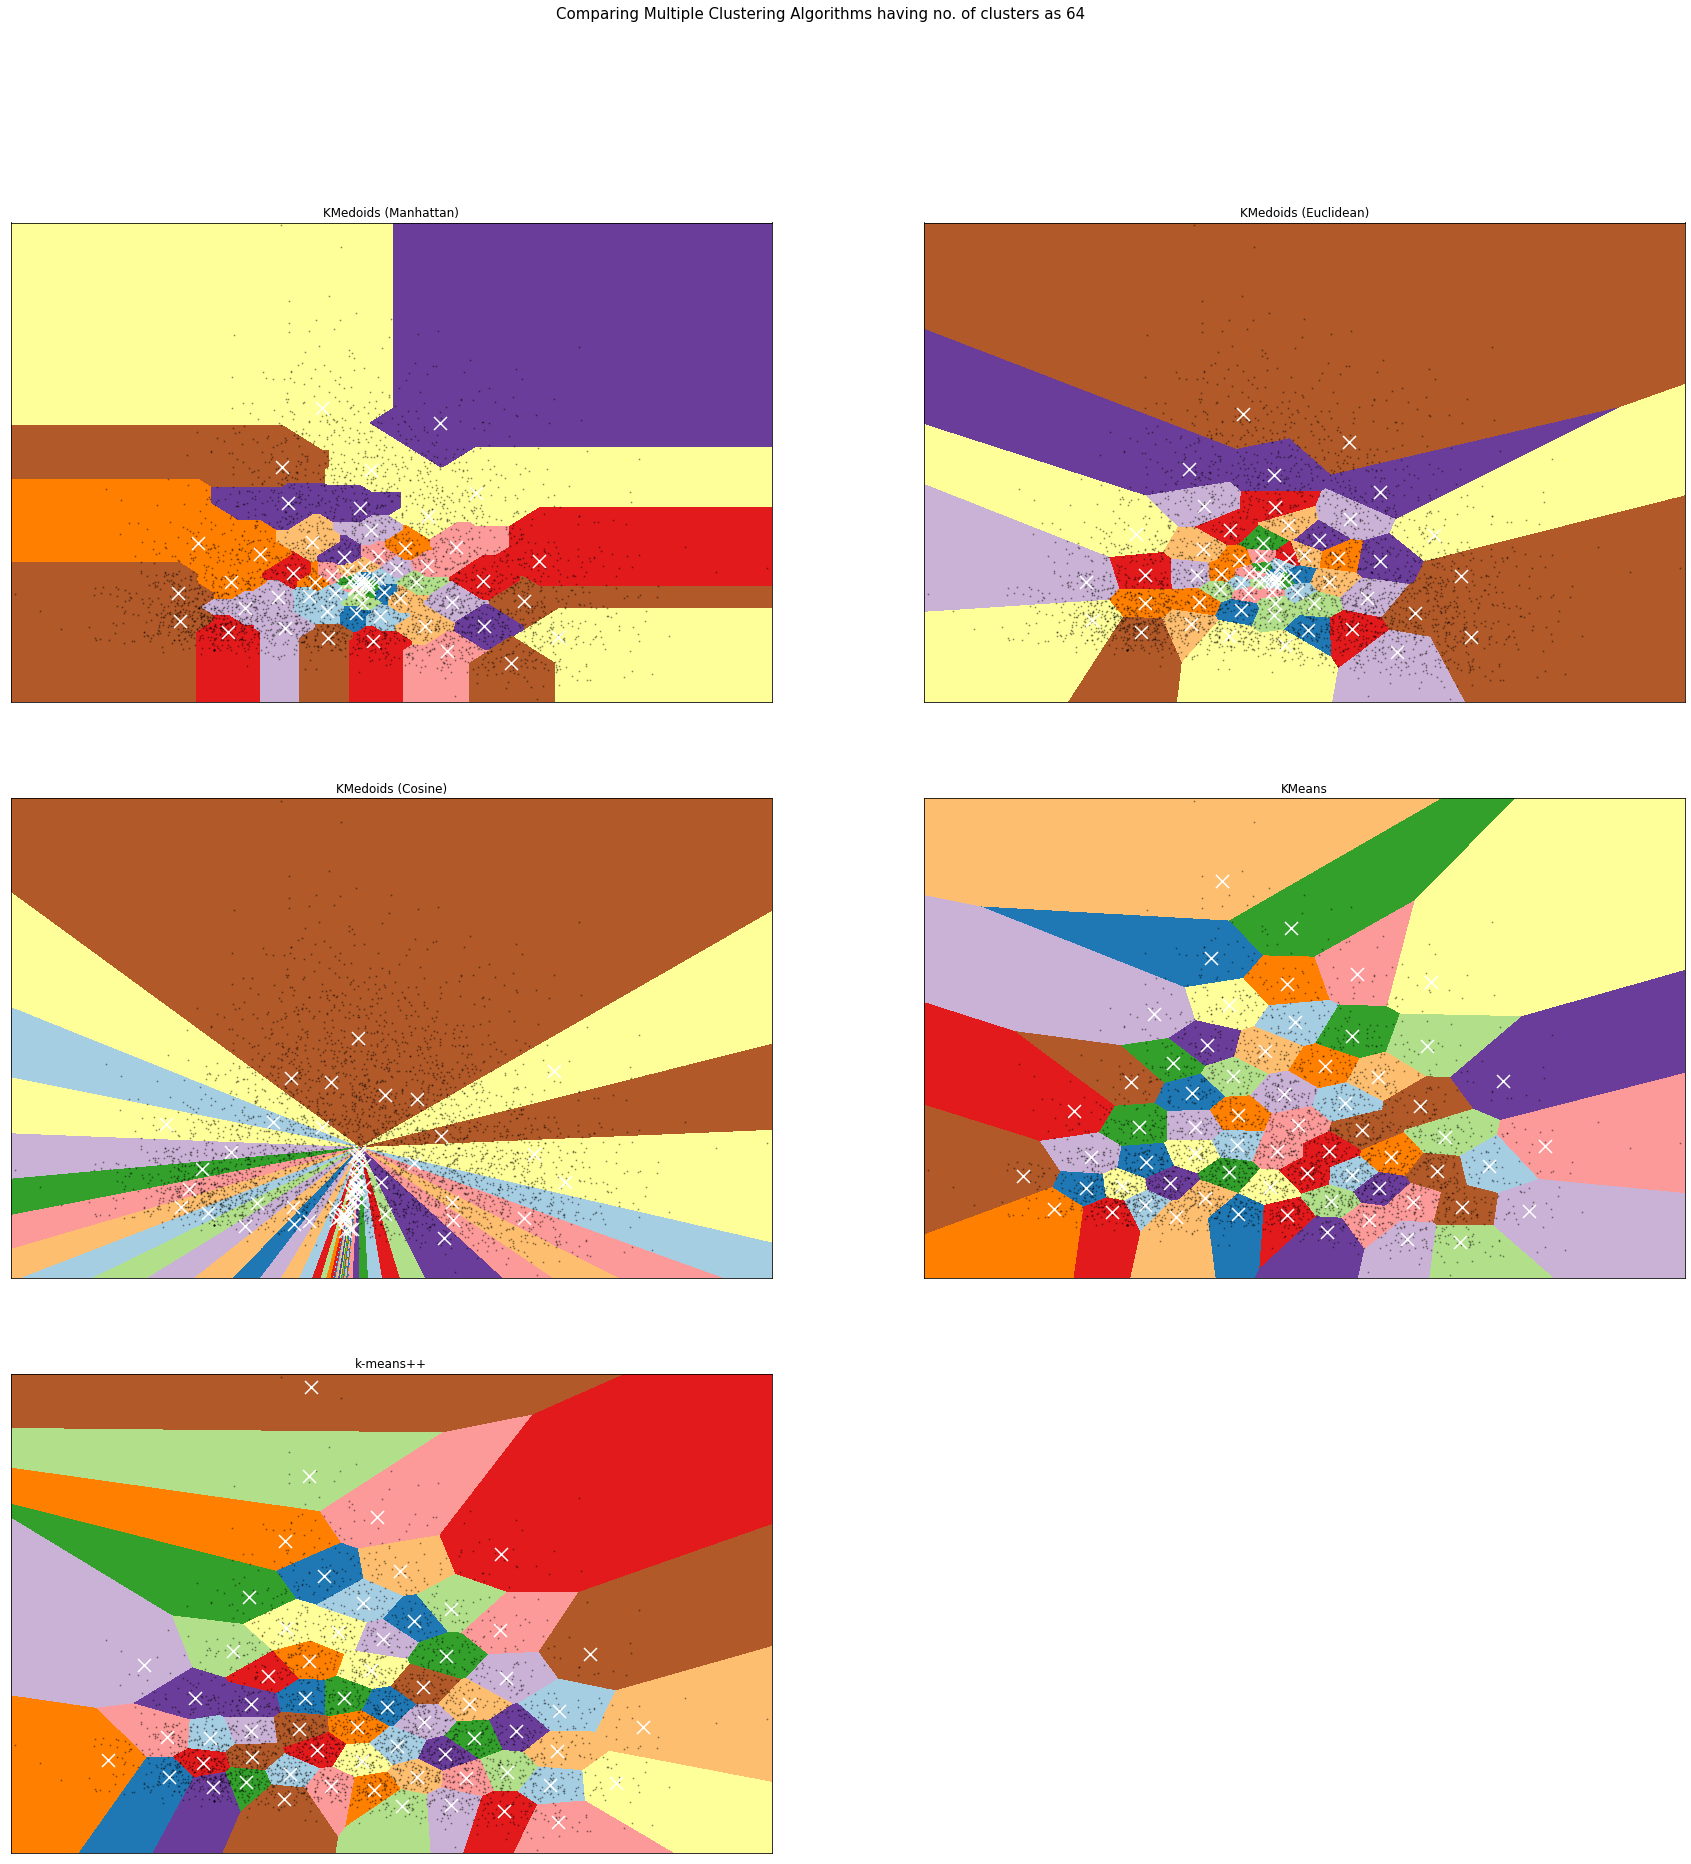

In [ ]:
plt.figure(figsize=(30,30))
plt.clf()

plt.suptitle("Comparing Multiple Clustering Algorithms having no. of clusters as 64",fontsize=15,)

choosed_models = [(KMedoids(metric="manhattan", n_clusters=64),"KMedoids (Manhattan)",),
                 (KMedoids(metric="euclidean", n_clusters=64),"KMedoids (Euclidean)",),
                 (KMedoids(metric="cosine", n_clusters=64), "KMedoids (Cosine)"),
                 (KMeans(n_clusters=64), "KMeans"),
                 (KMeans(n_clusters=64, init='k-means++'),"k-means++")]

plot_rows = 2
plot_cols = 3

for i, (i_model, description) in enumerate(choosed_models):
    i_model.fit(traindf)
    Y = i_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Y = Y.reshape(xx.shape)
    plt.subplot(plot_cols, plot_rows, i + 1)                                    # Put the result into a color plot
    plt.imshow(Y, interpolation="nearest", extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect="auto", origin="lower",)
    plt.plot(traindf[:, 0], traindf[:, 1], "k.", markersize=2, alpha=0.3)


    centroids = i_model.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3, color="w", zorder=10,)
                                        # set centroids shape as a X        ; set centroids color as a white
    plt.title(description)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
plt.show()

# **Model Selected:**

In [ ]:
KMeansplusModel = KMeans(n_clusters=32, init='k-means++')               # Initialize KMeans++ Model

In [ ]:
KMeansplusModel = KMeansplusModel.fit(traindf)                          # Fitting traindf to the Model

In [ ]:
CenterOfClusters = KMeansplusModel.cluster_centers_
print('Centers Of Clusters: ')
print(CenterOfClusters)

Centers Of Clusters: 
[[ -1.04591733  31.98930718]
 [  5.37306857 -10.4235895 ]
 [-34.98341388 -17.05044221]
 [ 35.79477962   8.57781968]
 [ 19.27050063 -18.56453117]
 [ -9.96370654  -5.85164241]
 [-12.59220517  63.74574688]
 [ 37.00578317  33.4915268 ]
 [  3.30415149   1.85996671]
 [-17.27289141  23.5054618 ]
 [ 19.1776717   22.03763872]
 [ -9.39293625 -20.52610127]
 [ 53.54155112  -5.08180611]
 [-36.36459532  -4.82139768]
 [-48.5299846  -15.34064078]
 [  6.2178093  -23.99144831]
 [-18.51814174  41.74705683]
 [ 24.17887822  59.83122894]
 [ -9.18041249   8.91209253]
 [-22.34820888 -12.01019496]
 [-36.37396634  13.67236807]
 [ 42.46601483 -25.72621343]
 [ 34.06044227 -10.0864329 ]
 [-25.60957105 -22.24525227]
 [ 26.6246274  -29.1650108 ]
 [  2.91180894  17.02189409]
 [ 19.57324742  -6.59444223]
 [ 16.78943393   6.57530739]
 [-22.58009408   2.83092771]
 [ 14.38172464  37.98383529]
 [  0.63083444  51.06200965]
 [ -3.44799125  85.33183402]]


In [ ]:
traindf_labels = KMeansplusModel.labels_
print("traindf labels: ",traindf_labels)

traindf labels:  [18  8 30 ... 16  4  4]


### **Perform Prediction on Testing DataFrame:**

In [ ]:
testdf_labels = KMeansplusModel.predict(testdf)
print("testdf labels: ",testdf_labels)

testdf labels:  [22 27  3 ... 11  2 21]


# **Evaluation**

## **On Training Data:**

In [ ]:
print("Silhouette Score : ",silhouette_score(traindf, traindf_labels, metric='euclidean'))
print("Calinski Harabasz Score : ",calinski_harabasz_score(traindf, traindf_labels))
print("Davies Bouldin Score : ",davies_bouldin_score(traindf, traindf_labels))

Silhouette Score :  0.33332730809127953
Calinski Harabasz Score :  3097.0786338604803
Davies Bouldin Score :  0.8091716724063527


## **On Testing Data:**

In [ ]:
print("Silhouette Score : ",silhouette_score(testdf, testdf_labels, metric='euclidean'))
print("Calinski Harabasz Score : ",calinski_harabasz_score(testdf, testdf_labels))
print("Davies Bouldin Score : ",davies_bouldin_score(testdf, testdf_labels))

Silhouette Score :  0.30249063124157866
Calinski Harabasz Score :  1208.970302392828
Davies Bouldin Score :  0.8363787158707806


**We got a Silhouette Score of 0.333 on training data and 0.302 on testing data. It shows our algorithm is performing good but some cluster's are overlapping each other.**

**We got a Calinski Harabasz Score of 3097.07 on training data and 1208.97 on testing data. Which is quite good.**

**We got a Davies Bouldin Score of 0.809 on training data and 0.836 on testing data. It shows that the separation between the clusters is low.**

**Thank you**,<br>
Nikunj Bansal,<br>
R177218063,<br>
B2 Batch<br>